In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# Importing useful Libraries 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Importing the datasets

In [0]:
dataset = pd.read_csv("/content/gdrive/My Drive/customer_churn_prediction/Churn_Modelling.csv")

In [6]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(10000, 14)

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
# Since RowNumber,CustomerId And Surname doesn't provide much information on predicting the customer churning behaviour in a bank
# So, we remove those columns in our dataset


In [0]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [9]:
X.shape

(10000, 10)

In [0]:
# Printing the  feature values of our dataset

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [0]:
# Printing the labels of our datasets

In [13]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [0]:
# By observing the feature values ,we know that country and gender are categorical values in the dataset and 
#  while building our machine learning models the categorical varaibale and values are not allowed. So we need to encode those categorical data

In [0]:
# Encoding Categorical Data

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [0]:
label_X_1 = LabelEncoder()
X['Geography'] = label_X_1.fit_transform(X['Geography'])
label_X_2 = LabelEncoder()
X['Gender'] = label_X_2.fit_transform(X['Gender'])


In [0]:
# 0 stans for France , 2 stands for Spain and 1 stands for germany
# 0 stands for Female and 1 stands for Male

In [19]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [20]:
# Since we are encoding three different countries France , Spain and germany as 0 , 2 and 1 . However there are not any relationship between these countries
# but encoding them like this shows that Spain is greater than germany and France mathematically. So for this purpose we need to perform one hot encoding.
X.Geography.values.shape

(10000,)

In [0]:
onehotencoder = OneHotEncoder()
ohe = onehotencoder.fit_transform(X.Geography.values.reshape(-1,1)).toarray()


In [0]:
# 0 stans for France , 2 stands for Spain and 1 stands for germany
# 0 stands for Female and 1 stands for Male

In [23]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [24]:
i = 0
for items in ohe:
  print(items)
  i+= 1
  if(i==5):
    break

[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]


In [0]:
encoded_df = pd.DataFrame(ohe,columns=['France','Germany','Spain'])

In [26]:
encoded_df

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [0]:
import pandas as pd


In [0]:
X = pd.concat([encoded_df,X],axis=1)

In [29]:
X

,France,Germany,Spain,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,0,1,39,5,0.00,2,1,0,96270.64
9996,1.0,0.0,0.0,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,0,36,7,0.00,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,1,42,3,75075.31,2,1,0,92888.52


In [0]:
# Removing one dummy feature / variable / columns.
# Dropping Geography columns and one dummy variable columns i.e. France 
# 

In [0]:
preprocessed_dataframe = X.drop(['France','Geography'],axis=1)

In [32]:
preprocessed_dataframe.head()

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10


In [0]:
trainable_data = preprocessed_dataframe.iloc[:,:].values


In [34]:
trainable_data[0]

array([0.0000000e+00, 0.0000000e+00, 6.1900000e+02, 0.0000000e+00,
       4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [35]:
trainable_labels = dataset.iloc[:,13].values
trainable_labels

array([1, 0, 1, ..., 1, 1, 0])

In [36]:
trainable_data.shape

(10000, 11)

In [0]:
# Splitting the dataset into Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(trainable_data,trainable_labels,test_size=0.2,random_state=0)

In [0]:
#Feature Scaling


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# Now Data preprocessing step is finished now we must focus on building the architecture of ANN 

In [0]:
#Importing the Keras Libraries and Packages

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
import tensorflow as tf

Using TensorFlow backend.


In [0]:
classifier = Sequential()


In [0]:
#Adding the input layer and the first hidden layer

In [0]:
classifier.add(Dense(units=8,kernel_initializer='uniform',input_dim=11))
classifier.add(Activation('relu'))

In [0]:
#Adding the second hidden layer 

In [0]:
classifier.add(Dense(units = 8,kernel_initializer='uniform',activation='relu'))

In [0]:
#Adding the output layer

In [0]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [0]:
#Compiling the ANN model

In [0]:
classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
# Fitting the ANN to the trainable splits

In [55]:
history = classifier.fit(X_train,y_train,batch_size=25,epochs=100)

Epoch 1/100
8000/8000 [==============================] - 1s 71us/step - loss: 0.4500 - accuracy: 0.7958
Epoch 2/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.4223 - accuracy: 0.8257
Epoch 3/100
8000/8000 [==============================] - 0s 39us/step - loss: 0.4171 - accuracy: 0.8336
Epoch 4/100
8000/8000 [==============================] - 0s 40us/step - loss: 0.4148 - accuracy: 0.8342
Epoch 5/100
8000/8000 [==============================] - 0s 40us/step - loss: 0.4143 - accuracy: 0.8317
Epoch 6/100
8000/8000 [==============================] - 0s 42us/step - loss: 0.4116 - accuracy: 0.8341
Epoch 7/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.4094 - accuracy: 0.8334
Epoch 8/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.4098 - accuracy: 0.8306
Epoch 9/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.4097 - accuracy: 0.8314
Epoch 10/100
8000/8000 [==============================] - 0s 41u

In [56]:
classifier.evaluate(X_test,y_test,verbose=2)

[0.3341301758885384, 0.8629999756813049]

In [0]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
cn = confusion_matrix(y_test,y_pred)

In [59]:
cn

array([[1519,   76],
       [ 198,  207]])

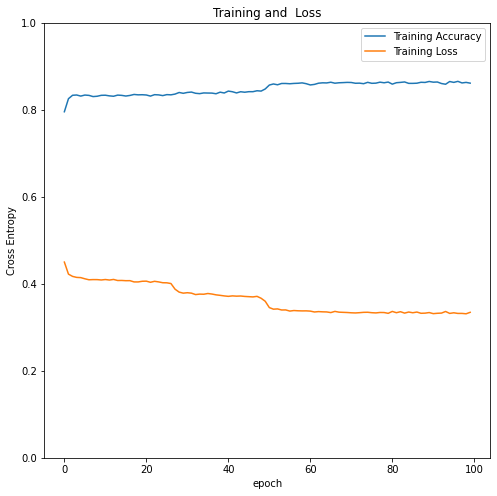

In [60]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training  Accuracy')

# plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and  Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
# Cross validating the model using splitting validation datasets by 20%

In [62]:
train_valid_history =classifier.fit(X_train,y_train,batch_size=25,epochs=100,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 0s 49us/step - loss: 0.3272 - accuracy: 0.8650 - val_loss: 0.3422 - val_accuracy: 0.8637
Epoch 2/100
6400/6400 [==============================] - 0s 48us/step - loss: 0.3292 - accuracy: 0.8652 - val_loss: 0.3418 - val_accuracy: 0.8644
Epoch 3/100
6400/6400 [==============================] - 0s 47us/step - loss: 0.3294 - accuracy: 0.8636 - val_loss: 0.3482 - val_accuracy: 0.8594
Epoch 4/100
6400/6400 [==============================] - 0s 51us/step - loss: 0.3286 - accuracy: 0.8639 - val_loss: 0.3607 - val_accuracy: 0.8531
Epoch 5/100
6400/6400 [==============================] - 0s 49us/step - loss: 0.3269 - accuracy: 0.8637 - val_loss: 0.3533 - val_accuracy: 0.8544
Epoch 6/100
6400/6400 [==============================] - 0s 47us/step - loss: 0.3290 - accuracy: 0.8630 - val_loss: 0.3407 - val_accuracy: 0.8612
Epoch 7/100
6400/6400 [==============================] - 0s 51us/step - loss

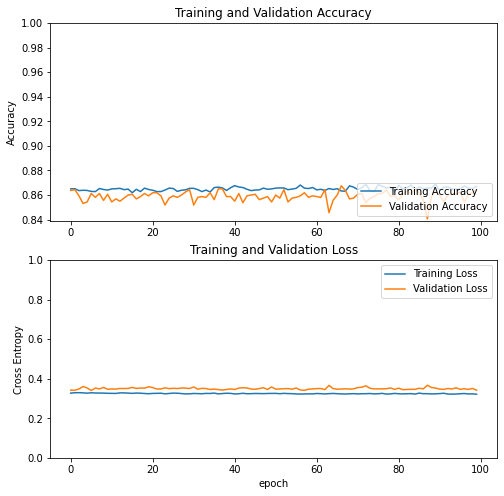

In [63]:
acc = train_valid_history.history['accuracy']
val_acc = train_valid_history.history['val_accuracy']

loss = train_valid_history.history['loss']
val_loss = train_valid_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
#Time for prediction
# Predict a single new observation if the customer with the following information will leave the bank or not

In [0]:
# Geography: France
# Credit Score : 600
# Gender : Male
# Age : 40
# Tenure : 3
# Balance : 60000
# No.of products: 2
# Has credit card : Yes
#  Is Active Member : Yes
#  Estimated Salary : 50000


In [65]:
preprocessed_dataframe

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,771,1,39,5,0.00,2,1,0,96270.64
9996,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,0.0,0.0,709,0,36,7,0.00,1,0,1,42085.58
9998,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [0]:
new_prediction_score = classifier.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))


In [67]:
new_prediction = (new_prediction_score > 0.5)
if(new_prediction==False):
  print("The customer won't leave the bank")
else:
  print("The customer will leave the bank")

The customer won't leave the bank


In [0]:
# K-Fold Cross Validation Strategy for getting the accurate model accuracy 

In [0]:
import sklearn
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [0]:
# Building a function to load the keras model 

In [0]:
def build_model():
  model = Sequential()
  model.add(Dense(units=8,kernel_initializer='uniform',input_dim=11))
  model.add(Activation('relu'))
  model.add(Dense(units = 8,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [0]:
model = KerasClassifier(build_fn=build_model,epochs=100,batch_size=25)

In [0]:
# Performing cross validation technique in all of our datasets

In [74]:

trainable_data.shape

(10000, 11)

In [75]:
len(trainable_labels)

10000

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
k_fold_train_valid = sc.fit_transform(trainable_data)


In [78]:
k_fold_train_valid.shape

(10000, 11)

In [0]:
cross_val_accuraies = cross_val_score(estimator=model,X=k_fold_train_valid,y=trainable_labels,cv=5,n_jobs=-1)

In [0]:
mean = cross_val_accuraies.mean()
variance = cross_val_accuraies.std()

In [81]:
print("The mean accuracy of our model after using k-fold cross validation is : ",mean)
print("The minimum accuracy of our model after using k-fold cross validation is : ",min(cross_val_accuraies))
print("The maximum accuracy of our model after using k-fold cross validation is : ",max(cross_val_accuraies))

The mean accuracy of our model after using k-fold cross validation is :  0.8532999992370606
The minimum accuracy of our model after using k-fold cross validation is :  0.8424999713897705
The maximum accuracy of our model after using k-fold cross validation is :  0.8585000038146973


In [0]:
# Tuning the hyperparameters of ANN

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


In [0]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [0]:
def build_classifier(units):
  tuning_model = Sequential()
  tuning_model.add(Dense(units=units,kernel_initializer='glorot_uniform',activation='relu',input_dim=11))
  tuning_model.add(Dense(units=units,kernel_initializer='glorot_uniform',activation='relu'))
  tuning_model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
  tuning_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])
  return tuning_model


In [0]:
tuning_model = KerasClassifier(build_classifier)

In [0]:
#  Choosing the hyperparameters by our ANN automatically for optimizing the accuracy of our models

In [0]:
parameters = {'batch_size':[16,32],
              'epochs':[150,200],
              'units':[16,32]}

In [0]:
grid_search = GridSearchCV(estimator = tuning_model,param_grid=parameters,scoring='accuracy',cv=5)

In [90]:
grid_search = grid_search.fit(X=X_train,y=y_train)

Streaming output truncated to the last 5000 lines.
6400/6400 [==============================] - 0s 42us/step - loss: 0.4034 - accuracy: 0.8277
Epoch 2/150
6400/6400 [==============================] - 0s 37us/step - loss: 0.3546 - accuracy: 0.8530
Epoch 3/150
6400/6400 [==============================] - 0s 36us/step - loss: 0.3513 - accuracy: 0.8561
Epoch 4/150
6400/6400 [==============================] - 0s 35us/step - loss: 0.3448 - accuracy: 0.8556
Epoch 5/150
6400/6400 [==============================] - 0s 34us/step - loss: 0.3392 - accuracy: 0.8600
Epoch 6/150
6400/6400 [==============================] - 0s 35us/step - loss: 0.3377 - accuracy: 0.8608
Epoch 7/150
6400/6400 [==============================] - 0s 35us/step - loss: 0.3345 - accuracy: 0.8620
Epoch 8/150
6400/6400 [==============================] - 0s 36us/step - loss: 0.3326 - accuracy: 0.8608
Epoch 9/150
6400/6400 [==============================] - 0s 35us/step - loss: 0.3315 - accuracy: 0.8634
Epoch 10/150
6400/6400 [=

In [0]:
best_parameters = grid_search.best_params_

In [0]:
best_accuracy = grid_search.best_score_

In [95]:
print(best_parameters)

{'batch_size': 16, 'epochs': 200, 'units': 16}


In [96]:
print(best_accuracy)

0.8478749999999999


In [0]:
# Applying best parameters and checking the model accuracy

In [0]:
best_model = Sequential()
best_model.add(Dense(units=16,kernel_initializer='uniform',input_dim=11))
best_model.add(Activation('relu'))
best_model.add(Dense(units = 16,kernel_initializer='uniform',activation='relu'))
best_model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False),loss='binary_crossentropy',metrics=['accuracy'])

In [99]:
best_model.fit(x=X_train,y=y_train,batch_size=16,epochs=200,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/200
6400/6400 [==============================] - 1s 82us/step - loss: 0.4418 - accuracy: 0.8005 - val_loss: 0.4179 - val_accuracy: 0.8294
Epoch 2/200
6400/6400 [==============================] - 0s 74us/step - loss: 0.4034 - accuracy: 0.8258 - val_loss: 0.3984 - val_accuracy: 0.8331
Epoch 3/200
6400/6400 [==============================] - 0s 74us/step - loss: 0.3866 - accuracy: 0.8398 - val_loss: 0.3901 - val_accuracy: 0.8400
Epoch 4/200
6400/6400 [==============================] - 0s 74us/step - loss: 0.3800 - accuracy: 0.8494 - val_loss: 0.3852 - val_accuracy: 0.8481
Epoch 5/200
6400/6400 [==============================] - 0s 72us/step - loss: 0.3735 - accuracy: 0.8498 - val_loss: 0.4009 - val_accuracy: 0.8425
Epoch 6/200
6400/6400 [==============================] - 0s 72us/step - loss: 0.3700 - accuracy: 0.8495 - val_loss: 0.3825 - val_accuracy: 0.8494
Epoch 7/200
6400/6400 [==============================] - 0s 72us/step - loss

In [100]:
best_model.fit(X_test,y_test,verbose=2)

Epoch 1/1
 - 0s - loss: 0.3573 - accuracy: 0.8595


In [0]:
# Since,batch_size of 25 is not included in our parameter tuning but 25 is the perfect batch size for getting good performance of our models. So checking
# the accuracy with other hyperparameters obtained from parameter tuning with batch_size of 25

In [101]:
best_model.fit(x=X_train,y=y_train,batch_size=25,epochs=200,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/200
6400/6400 [==============================] - 0s 50us/step - loss: 0.2947 - accuracy: 0.8758 - val_loss: 0.4115 - val_accuracy: 0.8600
Epoch 2/200
6400/6400 [==============================] - 0s 51us/step - loss: 0.2887 - accuracy: 0.8773 - val_loss: 0.4176 - val_accuracy: 0.8544
Epoch 3/200
6400/6400 [==============================] - 0s 49us/step - loss: 0.2891 - accuracy: 0.8766 - val_loss: 0.4233 - val_accuracy: 0.8575
Epoch 4/200
6400/6400 [==============================] - 0s 49us/step - loss: 0.2888 - accuracy: 0.8752 - val_loss: 0.4253 - val_accuracy: 0.8625
Epoch 5/200
6400/6400 [==============================] - 0s 50us/step - loss: 0.2910 - accuracy: 0.8737 - val_loss: 0.4165 - val_accuracy: 0.8619
Epoch 6/200
6400/6400 [==============================] - 0s 48us/step - loss: 0.2884 - accuracy: 0.8788 - val_loss: 0.4351 - val_accuracy: 0.8544
Epoch 7/200
6400/6400 [==============================] - 0s 49us/step - loss

In [102]:
best_model.evaluate(X_test,y_test)

2000/2000 [==============================] - 0s 19us/step


[0.42109848076105116, 0.8654999732971191]

In [0]:
best_model = Sequential()
best_model.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=11))
best_model.add(Dense(units = 16,kernel_initializer='uniform',activation='relu'))
best_model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
best_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [115]:
best_model.fit(x=X_train,y=y_train,batch_size=25,epochs=200,validation_data=(X_test,y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/200
8000/8000 [==============================] - 0s 54us/step - loss: 0.3122 - accuracy: 0.8712 - val_loss: 0.3387 - val_accuracy: 0.8545
Epoch 2/200
8000/8000 [==============================] - 0s 51us/step - loss: 0.3128 - accuracy: 0.8695 - val_loss: 0.3491 - val_accuracy: 0.8445
Epoch 3/200
8000/8000 [==============================] - 0s 52us/step - loss: 0.3129 - accuracy: 0.8677 - val_loss: 0.3392 - val_accuracy: 0.8660
Epoch 4/200
8000/8000 [==============================] - 0s 53us/step - loss: 0.3122 - accuracy: 0.8706 - val_loss: 0.3411 - val_accuracy: 0.8580
Epoch 5/200
8000/8000 [==============================] - 0s 52us/step - loss: 0.3127 - accuracy: 0.8715 - val_loss: 0.3348 - val_accuracy: 0.8565
Epoch 6/200
8000/8000 [==============================] - 0s 53us/step - loss: 0.3124 - accuracy: 0.8711 - val_loss: 0.3402 - val_accuracy: 0.8590
Epoch 7/200
8000/8000 [==============================] - 0s 52us/step - loss

In [0]:
rms_model = Sequential()
rms_model.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=11))
rms_model.add(Dense(units = 16,kernel_initializer='uniform',activation='relu'))
rms_model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
rms_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [117]:
final_history = rms_model.fit(x=X_train,y=y_train,batch_size=25,epochs=200,validation_data=(X_test,y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/200
8000/8000 [==============================] - 0s 60us/step - loss: 0.5027 - accuracy: 0.7960 - val_loss: 0.4326 - val_accuracy: 0.7975
Epoch 2/200
8000/8000 [==============================] - 0s 49us/step - loss: 0.4295 - accuracy: 0.7960 - val_loss: 0.4249 - val_accuracy: 0.7975
Epoch 3/200
8000/8000 [==============================] - 0s 49us/step - loss: 0.4228 - accuracy: 0.8031 - val_loss: 0.4173 - val_accuracy: 0.8200
Epoch 4/200
8000/8000 [==============================] - 0s 50us/step - loss: 0.4173 - accuracy: 0.8244 - val_loss: 0.4144 - val_accuracy: 0.8315
Epoch 5/200
8000/8000 [==============================] - 0s 49us/step - loss: 0.4136 - accuracy: 0.8288 - val_loss: 0.4079 - val_accuracy: 0.8360
Epoch 6/200
8000/8000 [==============================] - 0s 50us/step - loss: 0.4104 - accuracy: 0.8329 - val_loss: 0.4074 - val_accuracy: 0.8375
Epoch 7/200
8000/8000 [==============================] - 0s 50us/step - loss

In [0]:
# From all the computations we can say that rms prop optimizer perform better than adam optimizer. So we the final model has 16 hidden layers with batch 
# size of 25 and optimizer equals adam and the epochs is equal to 200 and the average validation and testing accuracy is 86%

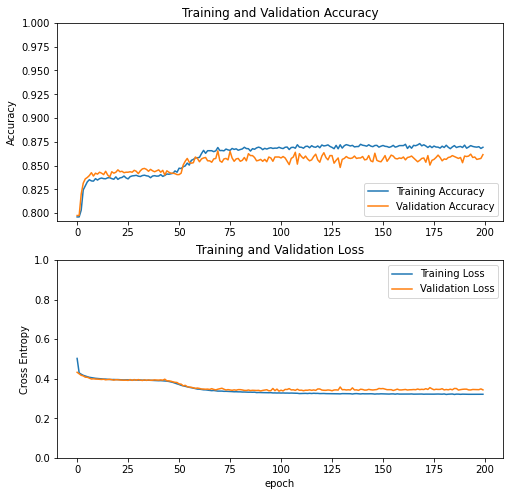

In [119]:
acc = final_history.history['accuracy']
val_acc = final_history.history['val_accuracy']

loss = final_history.history['loss']
val_loss = final_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
# Saving our model and it's architecture
# Since rms prop is performing well so we serailize rms_prop model to use it further for deployment.

In [122]:
# serialize model to JSON
model_json = rms_model.to_json()
with open("customer_churn_prediction_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
rms_model.save_weights("customer_churn_prediction_model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# Saving the model weights in your google drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': '1WPJKqUwcgnQz6aMP2yZM9l4d-71cUyBa'}]})
file.SetContentFile('/content/customer_churn_prediction_model.h5')
file.Upload() 

In [0]:
# Saving your model architecture in your google drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': '1WPJKqUwcgnQz6aMP2yZM9l4d-71cUyBa'}]})
file.SetContentFile('/content/customer_churn_prediction_model.json')
file.Upload() 